In [0]:
import numpy as np
import pandas as pd

In [0]:
iris = pd.read_csv('/home/stephen/Iris/data/Iris.csv')
iris.shape

(150, 6)

In [0]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
x = iris.iloc[:, 1:5].values #  把横行列的名称，去掉第一行id，因为没什么用
y = pd.Categorical(iris['Species']).codes # 把竖行的Species这一列的名字转换为代码

In [0]:
############## 用kmean的算法 #######################

from sklearn.cluster import KMeans

#### 定义一个字典
estimators = {'k_means_iris_3' : KMeans(n_clusters = 3),
              'k_means_iris_4' : KMeans(n_clusters = 4),
              'k_means_iris_5' : KMeans(n_clusters = 5),
              'k_means_iris_6' : KMeans(n_clusters = 6)}

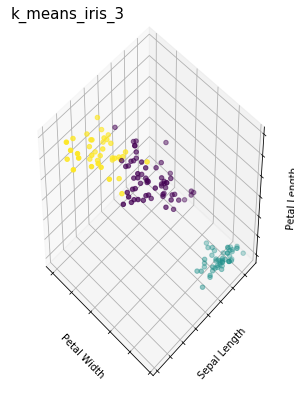

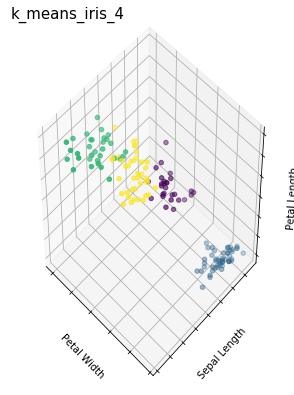

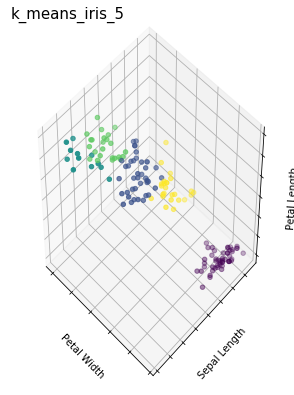

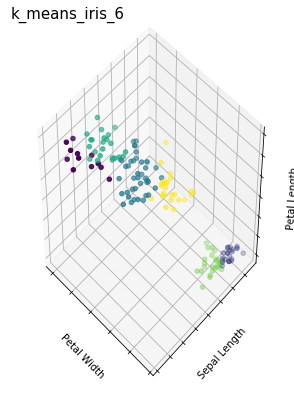

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 定义number， 用kmean的方法
# Iterate all estimators which includes KMeans Instances
fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize = (4, 5))
    plt.clf()
    ax = Axes3D(fig, rect = [0, 0, .95, 1], elev = 48, azim = 134)
    plt.cla()
    est.fit(x)
    labels = est.labels_
    ax.scatter(x[:, 3], x[:, 0], x[:, 2], c = labels.astype(np.float))
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal Width') ### Petal 花瓣
    ax.set_ylabel('Sepal Length') ### sepal 萼片
    ax.set_zlabel('Petal Length')
    ax.set_title(name, loc = 'left', fontsize = 15)
    fignum += fignum
plt.show()

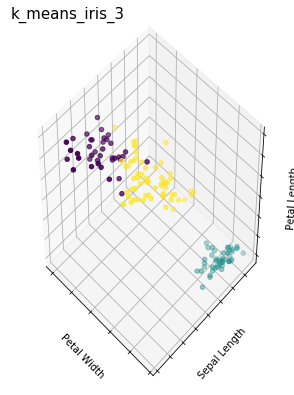

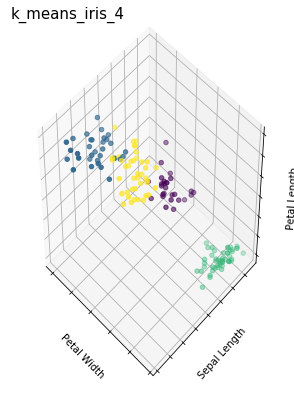

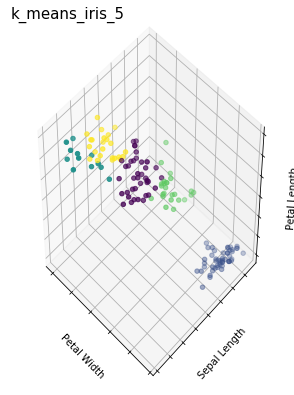

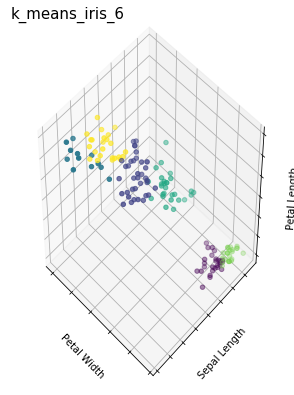

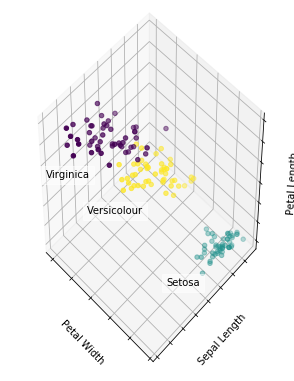

In [0]:
## 画图 用mean的方法
# Plot 
fig = plt.figure(fignum, figsize = (4, 5))
plt.clf()
ax = Axes3D(fig, rect = [0, 0,.95, 1], elev = 48, azim = 134)

plt.cla()
for name, label in [('Setosa', 0),
                   ('Versicolour', 1),
                   ('Virginica', 2)]:
    ax.text3D(x[y == label, 3].mean(),
              x[y == label, 0].mean() + 1.5,
              x[y == label, 2].mean(), name,
              horizontalalignment = 'center',
              bbox = dict(alpha = .5, edgecolor = 'w', facecolor = 'w'))
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(x[:, 3], x[:, 0], x[:,2], c= y)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Length')
ax.set_zlabel('Petal Length')

plt.show()

In [0]:
############### hiearchical 算法 ########################

iris_SP = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
iris_SP.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


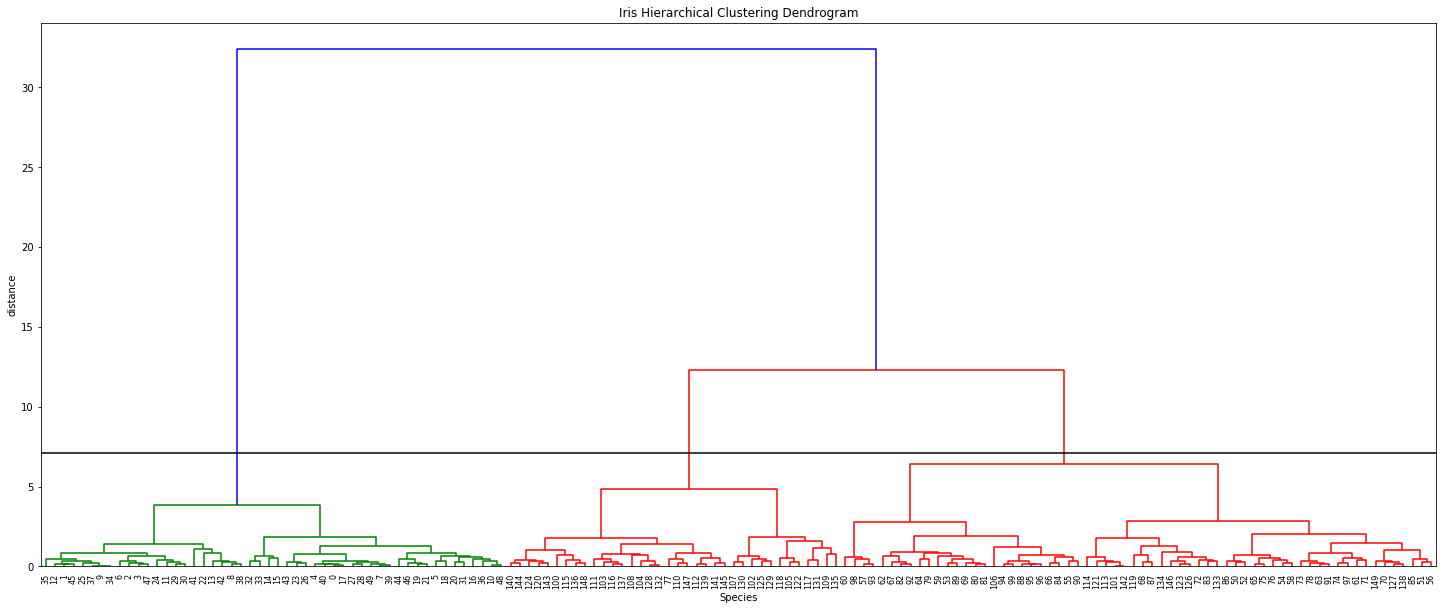

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(iris_SP, 'ward')
max_d = 7.08
plt.figure(figsize = (25, 10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(z,
           truncate_mode ='lastp', #shwo only the last p merged clusters
           p = 150,
           leaf_rotation = 90.,
           leaf_font_size =8.,)
plt.axhline(y = max_d, c = 'k')
plt.show()